In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import linear_model #FOR LINEAR REGRESSION
from sklearn.linear_model import LogisticRegression #FOR LOGISTIC REGRESSION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load data
training = pd.read_csv(r"C:\Users\ankur\Documents\Data mining\HW1\Disease-Prediction-Using-Machine-Learning--main\Training.csv")

In [4]:
training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [5]:
del training[training.columns[-1]]
training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
training.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [7]:
training.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
training.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
X=training.iloc[:,:-1]

In [11]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [12]:
ft = X.columns

In [13]:
Y = training.iloc[:,-1]

In [14]:
Y.value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [15]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [16]:
Y_encoded

array([15, 15, 15, ..., 38, 35, 27])

Referenced from: https://analyticsindiamag.com/a-hands-on-guide-to-ridge-regression-for-feature-selection/
Dropped Ridge regression as discussed with professor.

In [17]:
# refrenced from https://www.statology.org/how-to-calculate-vif-in-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc) + " VIF value is: " + str(max(vif)))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

# calculate_vif_(X)

In [18]:
X = calculate_vif_(X)

C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'throat_irritation' at index: 51 VIF value is: inf
dropping 'redness_of_eyes' at index: 51 VIF value is: inf
dropping 'sinus_pressure' at index: 51 VIF value is: inf
dropping 'runny_nose' at index: 51 VIF value is: inf
dropping 'congestion' at index: 51 VIF value is: inf
dropping 'enlarged_thyroid' at index: 66 VIF value is: inf
dropping 'brittle_nails' at index: 66 VIF value is: inf
dropping 'slurred_speech' at index: 70 VIF value is: inf
dropping 'increased_appetite' at index: 96 VIF value is: inf
dropping 'receiving_blood_transfusion' at index: 102 VIF value is: inf
dropping 'coma' at index: 103 VIF value is: inf
dropping 'abnormal_menstruation' at index: 93 VIF value is: 175.71721774829984
dropping 'swollen_extremeties' at index: 66 VIF value is: 108.18350414361213
dropping 'palpitations' at index: 107 VIF value is: 63.19772079072887
dropping 'phlegm' at index: 50 VIF value is: 62.22355630037236
dropping 'polyuria' at index: 93 VIF value is: 58.80784204575926
dropping 'irr

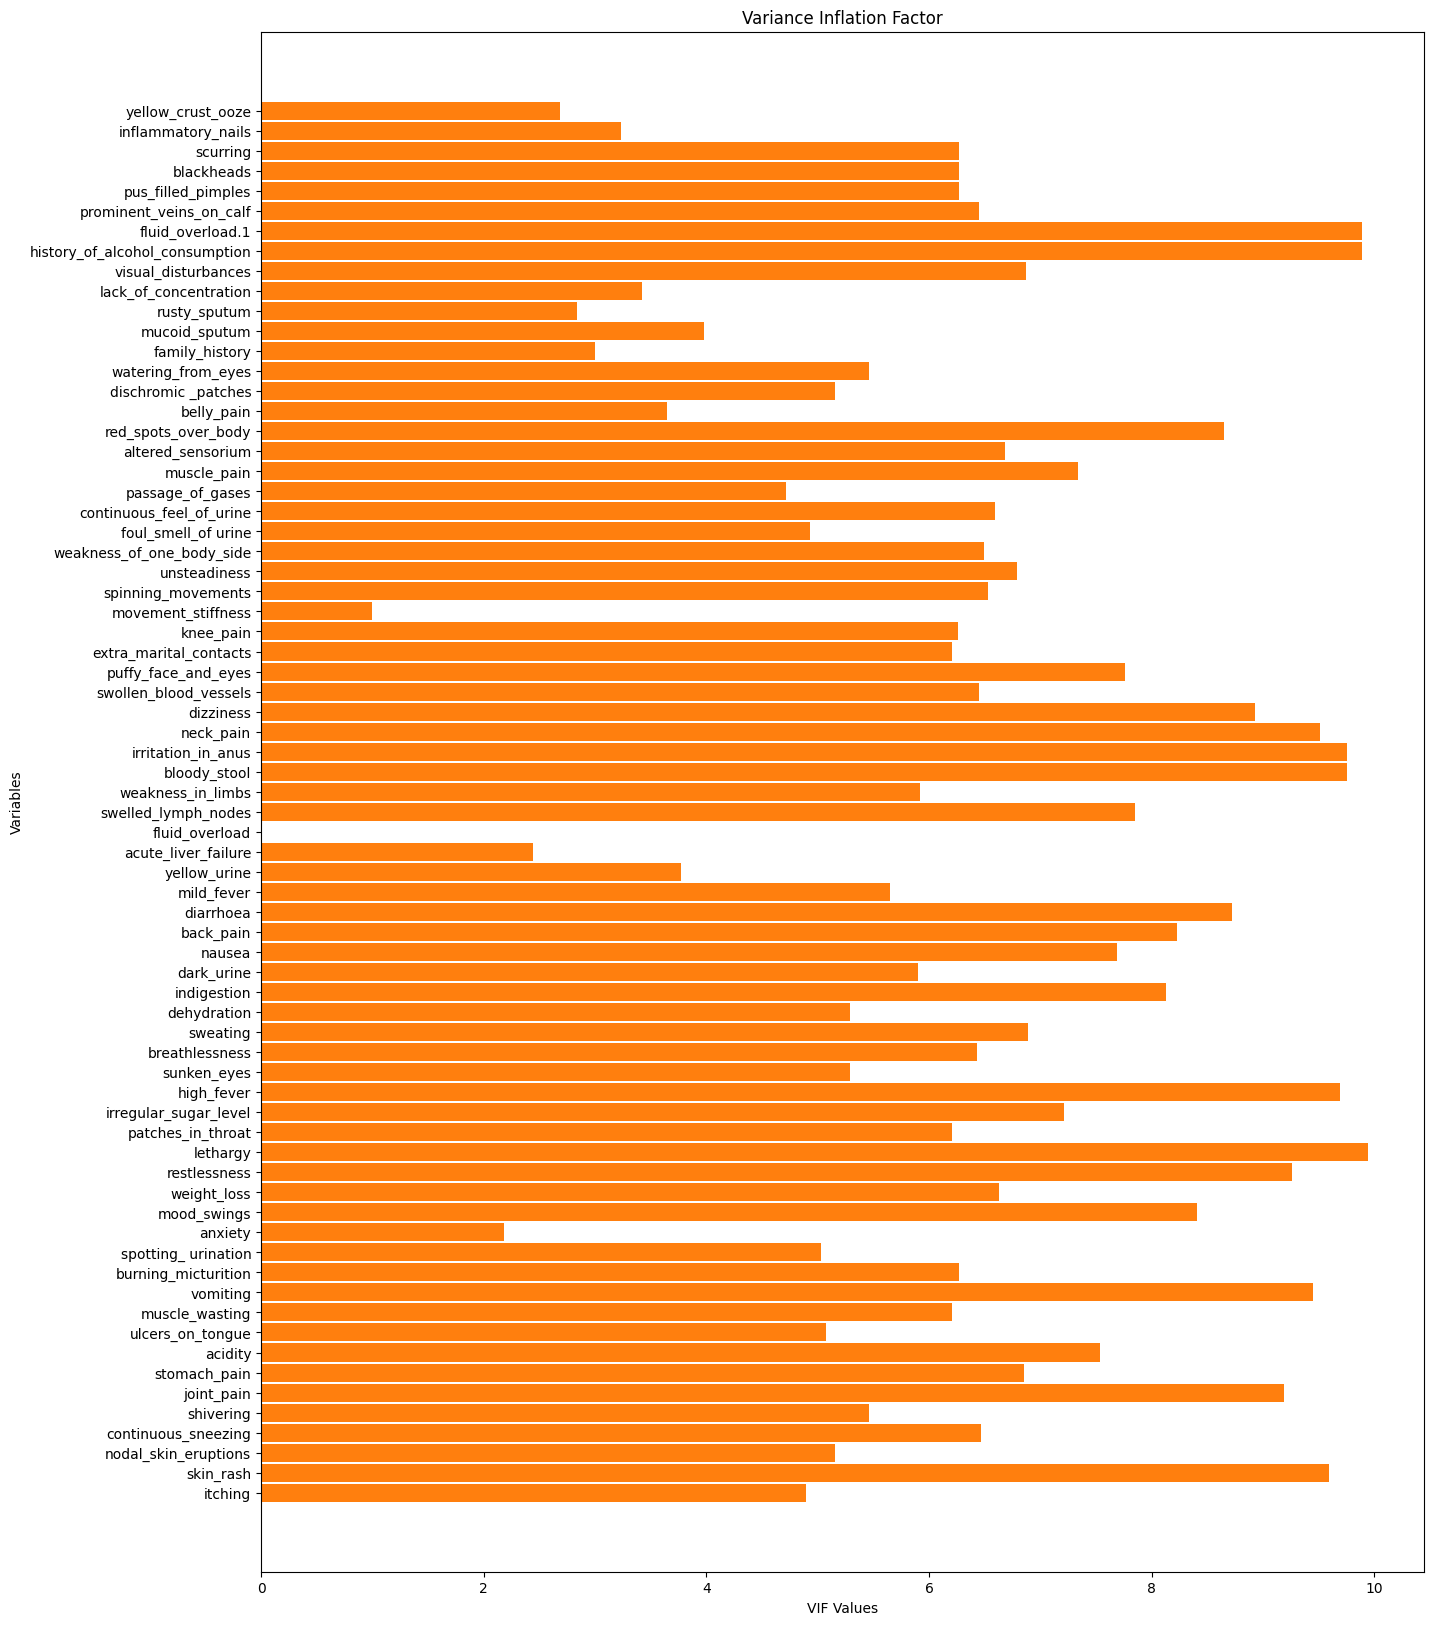

In [19]:
import matplotlib.pyplot as plt

# Calculate VIF values
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a stacked bar graph of the VIF values
plt.figure(figsize= (15,20))
plt.barh(X.columns, vif_values, height=0.9)
plt.barh(X.columns, vif_values, height=0.9, left=[0]*len(X.columns))

# Add labels to the x-axis and y-axis
plt.xlabel('VIF Values')
plt.ylabel('Variables')

# Add a title
plt.title('Variance Inflation Factor')

# Display the graph
plt.show()


In [20]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,lack_of_concentration,visual_disturbances,history_of_alcohol_consumption,fluid_overload.1,prominent_veins_on_calf,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# KNN

In [153]:
from sklearn.feature_selection import SelectKBest, f_classif

# create an instance of SelectKBest with f_classif as the score function and k value
selector = SelectKBest(score_func=f_classif, k=40)

# fit the selector to the training data and transform the data to select the top k features
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)
# X_train_selected.columns

C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [33 59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [154]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

# fit the classifier to the selected training data
knn.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
knn_accuracy = knn.score(X_test_selected, Y_test)
print(knn_accuracy)

0.9176829268292683


In [155]:
Y_pred = knn.predict(X_test_selected)
Y_pred

array(['Fungal infection', 'Gastroenteritis', 'Typhoid',
       'Gastroenteritis', 'Hypoglycemia', 'Impetigo', 'Typhoid',
       'Peptic ulcer diseae', 'Hypertension ',
       'Dimorphic hemmorhoids(piles)', 'Bronchial Asthma', 'Jaundice',
       'Dimorphic hemmorhoids(piles)', 'Hepatitis E', 'Fungal infection',
       'Impetigo', 'Cervical spondylosis', 'Fungal infection',
       'Osteoarthristis', 'Osteoarthristis', 'Cervical spondylosis',
       'Bronchial Asthma', 'Arthritis', 'Hepatitis E', 'Bronchial Asthma',
       'Common Cold', 'Acne', 'Acne', 'Dimorphic hemmorhoids(piles)',
       'Typhoid', 'Urinary tract infection', 'Allergy', 'Acne', 'Acne',
       'Fungal infection', 'Hypoglycemia', 'Acne', 'Hypoglycemia',
       'Hepatitis E', 'Chicken pox', 'Hepatitis B',
       'Cervical spondylosis', '(vertigo) Paroymsal  Positional Vertigo',
       'Varicose veins', 'Allergy', 'Bronchial Asthma', 'Hepatitis E',
       'Hepatitis C', 'Arthritis', 'Common Cold', 'Acne', 'Acne',
       

In [156]:
#To simulate user input
Y_pred_sample = knn.predict([X_test_selected[0]])
Y_pred_sample

array(['Fungal infection'], dtype=object)

In [157]:
Medicine_suggestions = {
  "Fungal infection": ["ketoconazole-oral-tablet", "Clotrimazole", "Miconazole"]
}

if Y_pred_sample[0] in Medicine_suggestions:
    print("We would recommend booking a appointement with a doctor but to treat the immidiate symptoms you might try the following recommended medicines:")
    print(Medicine_suggestions[Y_pred_sample[0]])
else:
    print("No suggestions available")

We would recommend booking a appointement with a doctor but to treat the immidiate symptoms you might try the following recommended medicines:
['ketoconazole-oral-tablet', 'Clotrimazole', 'Miconazole']


<Axes: ylabel='Count'>

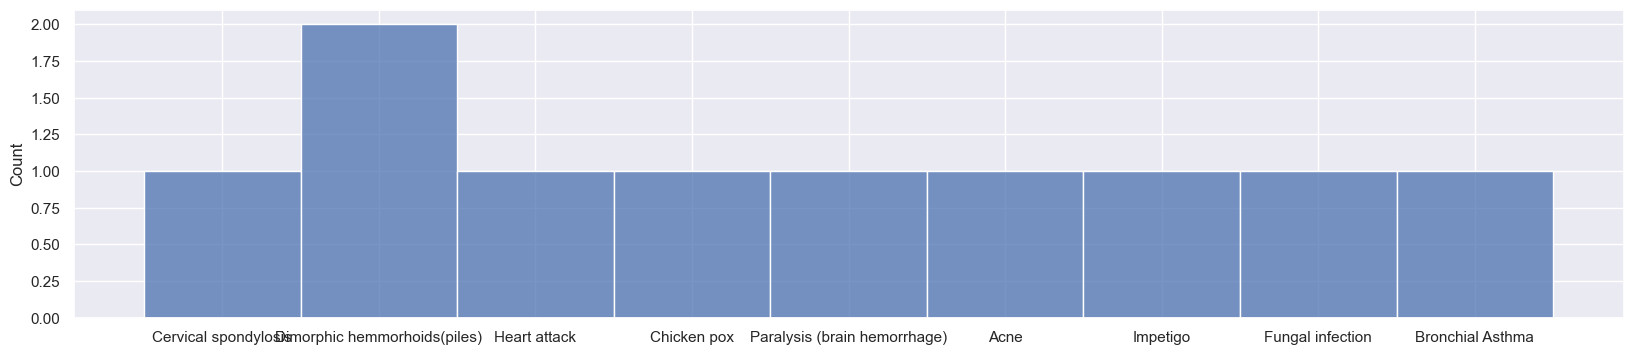

In [101]:
import seaborn as sns
sns.set(rc={"figure.figsize":(20, 4)})
sns.histplot(Y_pred[np.random.choice(len(Y_pred), size=10, replace=False)],bins=10)               #Using seaborn alongwith matplotlib to display overall distribution plot

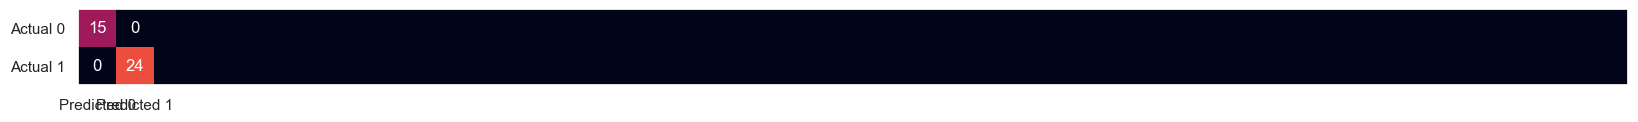

In [110]:
confusionMatrix = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(confusionMatrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionMatrix[i, j], ha='center', va='center', color='white')
plt.show()

In [112]:
#Cross-validation
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42) 
label_encoder = LabelEncoder()
Y_enc = label_encoder.fit_transform(Y_validation)
cv_predictions = cross_val_predict(knn, X_validation, Y_enc, cv=kf)


rmse_cv = np.sqrt(mean_squared_error(Y_enc, cv_predictions))
mae_cv = mean_absolute_error(Y_enc, cv_predictions)

# Report results
print(f'Cross-Validated RMSE: {rmse_cv:.2f}')
print(f'Cross-Validated MAE: {mae_cv:.2f}')

Cross-Validated RMSE: 0.05
Cross-Validated MAE: 0.00


# Naive Bayes

In [131]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
nb = MultinomialNB()
X_train_shifted = X_train_selected - np.min(X_train_selected) + 1  # Shift all values by 1
X_test_shifted = X_test_selected - np.min(X_test_selected) + 1 
# Train the classifier using the training data
nb.fit(X_train_shifted, Y_train)

# Predict on the test data
y_pred1 = nb.predict(X_test_shifted)

# Print the predicted values
# print(y_pred1)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(Y_test, y_pred1)
print("Accuracy:", nb_accuracy)

Accuracy: 0.9085365853658537


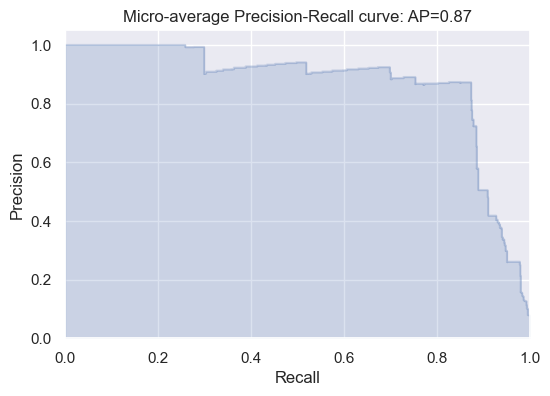

In [132]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))

# Train the classifier using the training data
nb.fit(X_train_shifted, Y_train)

# Predict on the test data
y_score = nb.predict_proba(X_test_shifted)

# Compute precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = Y_test_bin.shape[1]
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test_bin[:, i], y_score[:, i])

# Compute micro-average precision-recall curve and score
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test_bin, y_score, average="micro")

# Plot the micro-average precision-recall curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Micro-average Precision-Recall curve: AP={0:0.2f}'
          .format(average_precision["micro"]))
plt.show()

# Decision Tree

In [115]:

from sklearn import tree
ent = tree.DecisionTreeClassifier(criterion = 'entropy')
ent = ent.fit(X_train_selected, Y_train)
# Predicting on the test data
y_pred = ent.predict(X_test_selected)
y_pred
result_entropy=pd.DataFrame()
dt_accuracy = accuracy_score(Y_test, y_pred)
#Calculates the accuracy score
from sklearn.metrics import accuracy_score
print(dt_accuracy)

0.915650406504065


In [116]:
ent.feature_importances_  

array([0.08887095, 0.08931189, 0.03074004, 0.00193714, 0.04017484,
       0.00051126, 0.0450132 , 0.02005156, 0.        , 0.01508694,
       0.09219277, 0.02479369, 0.1433965 , 0.00292911, 0.01945881,
       0.00230729, 0.00789754, 0.00059725, 0.01713913, 0.00161508,
       0.027423  , 0.0020309 , 0.00135263, 0.02490761, 0.01685744,
       0.01919796, 0.02602264, 0.05474284, 0.01816671, 0.01364809,
       0.01081988, 0.03471584, 0.00143409, 0.01050552, 0.02158403,
       0.00063972, 0.02078968, 0.02417843, 0.01069527, 0.01626273])

In [117]:
from sklearn.feature_selection import SelectKBest, f_classif

# create an instance of SelectKBest with f_classif as the score function and k value
selector = SelectKBest(score_func=f_classif, k=40)

# fit the selector to the training data and transform the data to select the top k features
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)
# X_train_selected.columns

C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [33 59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [118]:

# Get the mask of selected features
mask = selector.get_support()

# Print the selected feature names
selected_features = X_train.columns[mask]
print("Selected features:", len(selected_features))

Selected features: 40


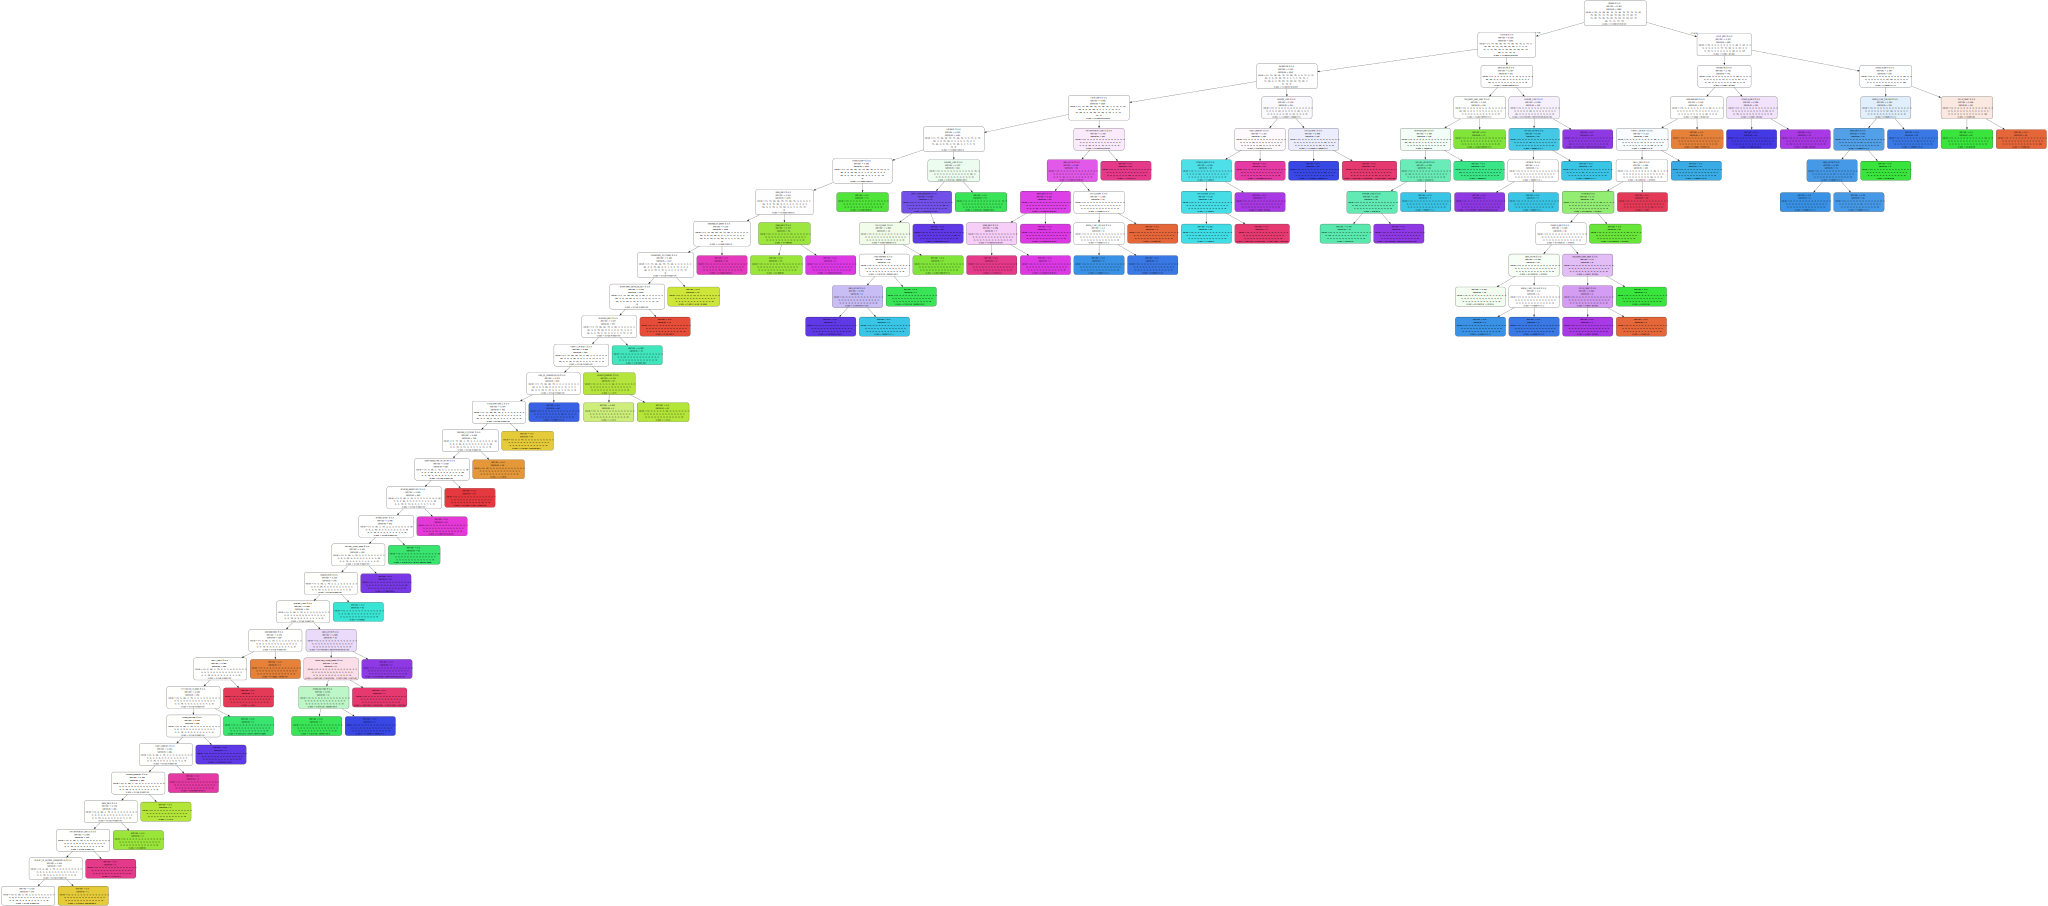

In [119]:
import graphviz
dot_data = tree.export_graphviz(ent, 
                   feature_names= selected_features,  
                   class_names=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'],  
                   filled=True, rounded=True,  
                   special_characters=True,
                    out_file=None,
                            )
graph = graphviz.Source(dot_data)
graph.render('DecisionTreeEntDiagram')
graph

# Support Vector Classifier (SVC)

In [121]:
# refrenced from https://www.baeldung.com/cs/svm-choose-kernel
from sklearn.svm import SVC

# create an SVC classifier
svcl = SVC(kernel='linear', probability = True)

# fit the classifier to the selected training data
svcl.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
svc_accuracyl = svcl.score(X_test_selected, Y_test)
print('For Linear Kernel - ',svc_accuracyl)

# create an SVC classifier
svcr = SVC(kernel='rbf', probability = True)

# fit the classifier to the selected training data
svcr.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
svc_accuracyr = svcr.score(X_test_selected, Y_test)
print('For RBF Kernel - ',svc_accuracyr)

# create an SVC classifier
svcp = SVC(kernel='poly', probability = True)

# fit the classifier to the selected training data
svcp.fit(X_train_selected, Y_train)

# evaluate the classifier on the selected test data
svc_accuracyp = svcp.score(X_test_selected, Y_test)
print('For Polynomial Kernel - ',svc_accuracyp)

For Linear Kernel -  0.9146341463414634
For RBF Kernel -  0.9176829268292683
For Polynomial Kernel -  0.8922764227642277


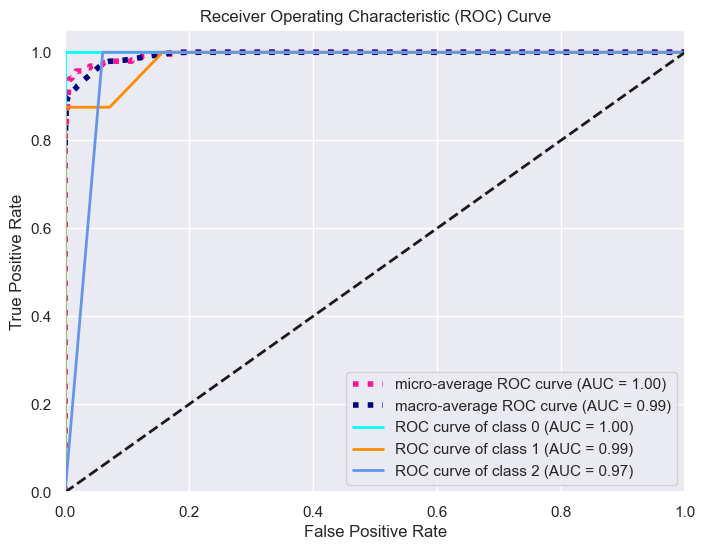

In [122]:
# refrenced from https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# fit the classifier to the selected training data
svcp.fit(X_train_selected, Y_train)

# predict class probabilities for the selected test data
Y_prob = svcp.predict_proba(X_test_selected)

# binarize the true labels to plot the ROC curves
lb = LabelBinarizer()
lb.fit(Y_test)
Y_test_bin = lb.transform(Y_test)

# compute the AUC score for each class
n_classes = Y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])
    roc_auc[i] = roc_auc_score(Y_test_bin[:, i], Y_prob[:, i])

# compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), Y_prob.ravel())
roc_auc["micro"] = roc_auc_score(Y_test_bin, Y_prob, average="micro")

# compute macro-average ROC curve and AUC score
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(Y_test_bin, Y_prob, average="macro")

# plot the ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [133]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(kernel='linear', probability = True),
    "KNN": KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski'),
    "Naive bayes":MultinomialNB()
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X_validation, Y_validation, cv = 5, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.99492386 0.98477157 0.98477157 0.98984772 1.        ]
Mean Score: 0.9908629441624365
KNN
Scores: [0.98984772 1.         1.         1.         1.        ]
Mean Score: 0.9979695431472081
Naive bayes
Scores: [1.         0.98477157 0.98477157 0.99492386 0.99489796]
Mean Score: 0.9918729928519632


# Neural Networks

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.4, random_state = 1)

In [179]:
from sklearn.feature_selection import SelectKBest, f_classif

# create an instance of SelectKBest with f_classif as the score function and k value
selector = SelectKBest(score_func=f_classif, k=40)

# fit the selector to the training data and transform the data to select the top k features
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)
# X_train_selected.columns

C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [33 59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [187]:
#https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(2, activation="ReLU"),
    layers.Dense(2, activation="ReLU"),
    layers.Dense(1, activation="Softmax")
])

In [192]:

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [195]:
#https://stackoverflow.com/questions/69970319/valueerror-exception-encountered-when-calling-layer-sequential-5-type-sequen
Y_pred = model.fit(X_train_selected,
                    Y_train,
                    epochs=10,
                    batch_size=100,
                    validation_data=(X_test, Y_test))

Epoch 1/10
 1/30 [>.............................] - ETA: 13s - loss: 2.4724e-06 - accuracy: 0.0300

ValueError: in user code:

    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_12' (type Sequential).
    
    Input 0 of layer "dense_36" is incompatible with the layer: expected axis -1 of input shape to have value 40, but received input with shape (None, 70)
    
    Call arguments received by layer 'sequential_12' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 70), dtype=int64)
      • training=False
      • mask=None


In [43]:
history_dict = Y_pred.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

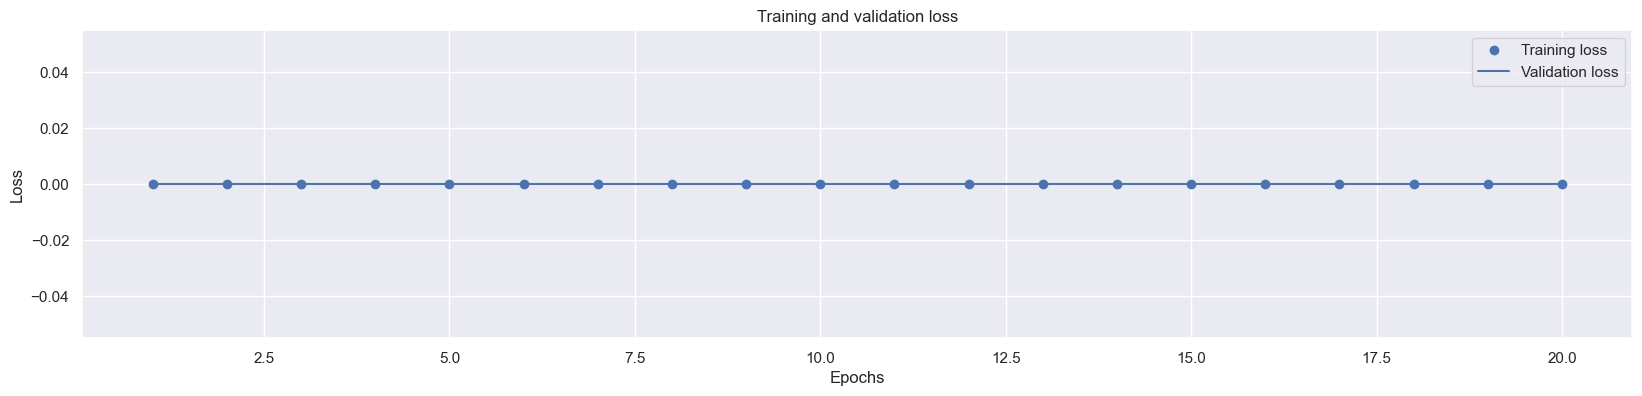

In [44]:
import matplotlib.pyplot as plt
history_dict = Y_pred.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

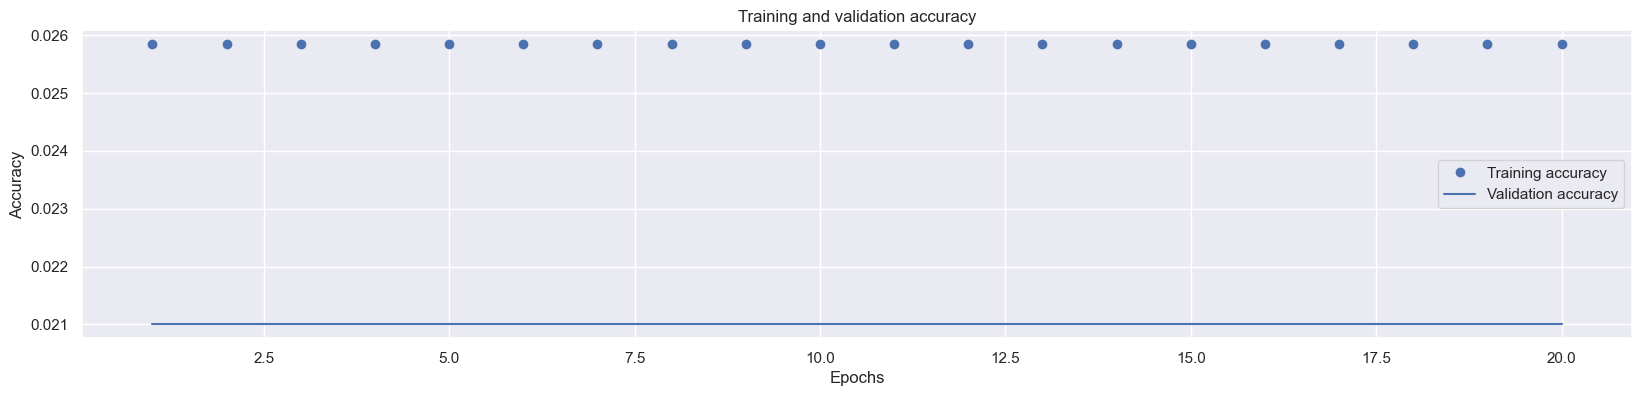

In [45]:
plt.clf()
acc = Y_pred.history["accuracy"]
val_acc = Y_pred.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, Y_test)

Epoch 1/4
7/7 [==============================] - 0s 1ms/step - loss: -2.6594 - accuracy: 0.0258
Epoch 2/4
7/7 [==============================] - 0s 1ms/step - loss: -5.6701 - accuracy: 0.0319
Epoch 3/4
7/7 [==============================] - 0s 1ms/step - loss: -8.4179 - accuracy: 0.0467
Epoch 4/4
47/47 [==============================] - 0s 706us/step - loss: -13.2692 - accuracy: 0.0454


In [47]:
results

[-13.269221305847168, 0.0453929528594017]

In [48]:
model.predict(X_test_selected[0])

ValueError: in user code:

    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


# Conclusion

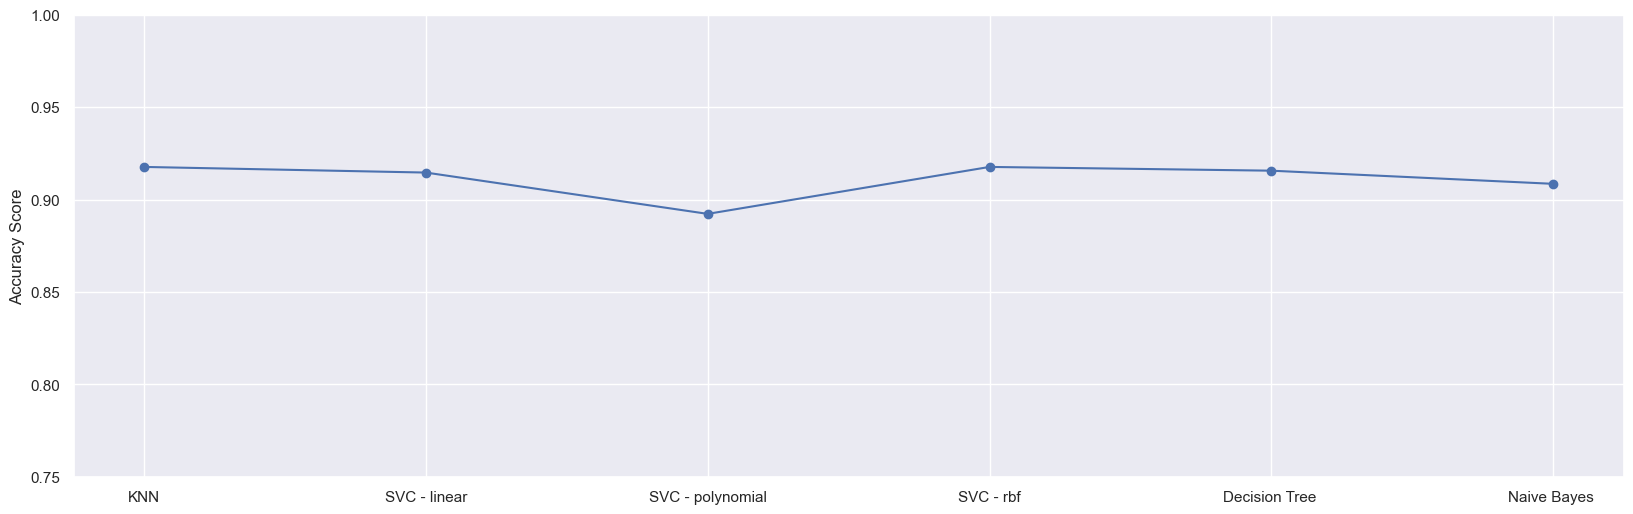

In [201]:
#plt.style.use('whitegrid')
plt.figure(figsize=(20, 6))
models = ['KNN', 'SVC - linear', 'SVC - polynomial', 'SVC - rbf', 'Decision Tree ', 'Naive Bayes ']
test_accuracy = [knn_accuracy, svc_accuracyl, svc_accuracyp, svc_accuracyr, dt_accuracy, nb_accuracy]
plt.plot(models, test_accuracy, '-o')
plt.ylim(0.75, 1.00)
plt.ylabel("Accuracy Score")
plt.show()